<a href="https://colab.research.google.com/github/GeoffreySaxena/Creating-Poems-with-Deep-Learning/blob/master/A_Poem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
tokenizer = Tokenizer()

data = open('/gdrive/My Drive/Poems.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'of': 5, 'i': 6, 'in': 7, 'that': 8, 'is': 9, 'my': 10, 'it': 11, 'with': 12, 'you': 13, 'he': 14, 'on': 15, 'his': 16, 'for': 17, 'but': 18, 'was': 19, 'they': 20, 'we': 21, 'when': 22, 'not': 23, 'as': 24, 'all': 25, 'at': 26, 'me': 27, 'like': 28, 'her': 29, 'have': 30, 'by': 31, 'this': 32, 'one': 33, 'or': 34, 'so': 35, 'be': 36, 'are': 37, 'from': 38, 'what': 39, 'who': 40, 'there': 41, 'your': 42, 'then': 43, 'no': 44, 'she': 45, 'if': 46, 'said': 47, 'had': 48, 'our': 49, 'would': 50, 'their': 51, 'up': 52, 'will': 53, 'them': 54, 'out': 55, 'am': 56, '”': 57, 'where': 58, 'down': 59, 'know': 60, 'say': 61, 'see': 62, 'could': 63, 'an': 64, 'were': 65, 'us': 66, 'its': 67, 'more': 68, 'into': 69, 'now': 70, 'white': 71, 'through': 72, 'some': 73, 'never': 74, 'him': 75, 'day': 76, 'how': 77, 'do': 78, 'world': 79, 'though': 80, 'little': 81, 'can': 82, 'night': 83, 'about': 84, 'just': 85, 'than': 86, 'light': 87, 'man': 88, 'too': 89, 'go'

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['stay'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['said'])
print(tokenizer.word_index['to'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['cut'])
print(tokenizer.word_index['flowers'])

312
6
47
4
1
531
532


In [6]:
print(xs[3])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1]


In [7]:
print(ys[3])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 20]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

In [10]:
print(model.summary())
print(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 105, 100)          624500    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 6245)              1879745   
Total params: 2,805,445
Trainable params: 2,805,445
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [12]:
callbacks = myCallback()

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=500, verbose=2, callbacks=[callbacks])

Epoch 1/500
887/887 - 55s - loss: 7.2600 - accuracy: 0.0683
Epoch 2/500
887/887 - 52s - loss: 6.2310 - accuracy: 0.1068
Epoch 3/500
887/887 - 52s - loss: 5.3702 - accuracy: 0.1534
Epoch 4/500
887/887 - 52s - loss: 4.4024 - accuracy: 0.2233
Epoch 5/500
887/887 - 52s - loss: 3.5758 - accuracy: 0.3111
Epoch 6/500
887/887 - 52s - loss: 2.9208 - accuracy: 0.4027
Epoch 7/500
887/887 - 52s - loss: 2.4546 - accuracy: 0.4773
Epoch 8/500
887/887 - 52s - loss: 2.1409 - accuracy: 0.5358
Epoch 9/500
887/887 - 52s - loss: 1.9497 - accuracy: 0.5685
Epoch 10/500
887/887 - 52s - loss: 1.8158 - accuracy: 0.5928
Epoch 11/500
887/887 - 52s - loss: 1.7193 - accuracy: 0.6102
Epoch 12/500
887/887 - 52s - loss: 1.6536 - accuracy: 0.6230
Epoch 13/500
887/887 - 52s - loss: 1.6138 - accuracy: 0.6300
Epoch 14/500
887/887 - 52s - loss: 1.5442 - accuracy: 0.6422
Epoch 15/500
887/887 - 52s - loss: 1.5283 - accuracy: 0.6457
Epoch 16/500
887/887 - 52s - loss: 1.5171 - accuracy: 0.6457
Epoch 17/500
887/887 - 52s - loss

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

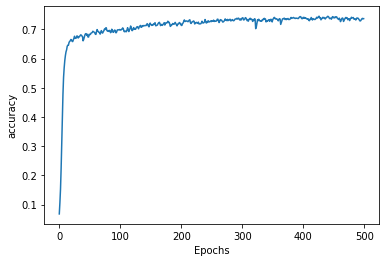

In [14]:
plot_graphs(history, 'accuracy')

In [21]:
seed_text = "Through enternity shall she love you"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Through enternity shall she love you to be too away is true for the light is a man in the sun in the darkness of a room i entered the purple city i hear lake water lapping it look look much fun to be like nickel for a terrible moment early that his soft old son


* Through enternity shall she love you 
* to be too away is true for the light is a man in the sun 
* in the darkness of a room i entered the purple city 
* i hear lake water lapping it look look much fun 
* to be like nickel for a terrible moment 
* early that his soft old son